# Hate Comment Classifier

## Import Some Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

## Reading Data

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Dropping ID

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


## Adding a column 'output' that classifies if the comment_text is toxic or not

In [6]:
for index, row in df.iterrows():
    df['output']=0;

In [7]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [8]:
for i in df.index:
    if(df['toxic'][i]==1):
        df['output'][i]=1
    elif(df['severe_toxic'][i]==1):
        df['output'][i]=1
    elif(df['obscene'][i]==1):
        df['output'][i]=1
    elif(df['threat'][i]==1):
        df['output'][i]=1
    elif(df['identity_hate'][i]==1):
        df['output'][i]=1
    elif(df['insult'][i]==1):
        df['output'][i]=1

<ipython-input-8-54a1225d3e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output'][i]=1
<ipython-input-8-54a1225d3e98>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output'][i]=1
<ipython-input-8-54a1225d3e98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output'][i]=1
<ipython-input-8-54a1225d3e98>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [9]:
df.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


## Preprocessing Data

### Convert 'comment_text' to LowerCase

In [10]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0


### Remove Punctuation

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
df['comment_text'] = df['comment_text'].apply(lambda x:  remove_punctuation(x))
df.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0
1,daww he matches this background colour im seem...,0,0,0,0,0,0,0
2,hey man im really not trying to edit war its j...,0,0,0,0,0,0,0
3,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0
5,\n\ncongratulations from me as well use the to...,0,0,0,0,0,0,0
6,cocksucker before you piss around on my work,1,1,1,0,1,0,1
7,your vandalism to the matt shirvington article...,0,0,0,0,0,0,0
8,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


### Tokenization

In [14]:
import re
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens
df['comment_text'] = df['comment_text'].apply(lambda x:  tokenize(x))
df.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output
0,"[explanation, why, the, edits, made, under, my...",0,0,0,0,0,0,0
1,"[daww, he, matches, this, background, colour, ...",0,0,0,0,0,0,0
2,"[hey, man, im, really, not, trying, to, edit, ...",0,0,0,0,0,0,0
3,"[, more, i, cant, make, any, real, suggestions...",0,0,0,0,0,0,0
4,"[you, sir, are, my, hero, any, chance, you, re...",0,0,0,0,0,0,0
5,"[, congratulations, from, me, as, well, use, t...",0,0,0,0,0,0,0
6,"[cocksucker, before, you, piss, around, on, my...",1,1,1,0,1,0,1
7,"[your, vandalism, to, the, matt, shirvington, ...",0,0,0,0,0,0,0
8,"[sorry, if, the, word, nonsense, was, offensiv...",0,0,0,0,0,0,0
9,"[alignment, on, this, subject, and, which, are...",0,0,0,0,0,0,0


### Stemming

In [34]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [38]:
# def stemming(tokenized_text):
#     text = [porter_stemmer.stem(word) for word in tokenized_text]
#     return text

In [39]:
# df['msg_stemmed'] = df['comment_text'].apply(lambda x: stemming(x))
# df.head()

RecursionError: maximum recursion depth exceeded in comparison

In [40]:
def stemming(row):
    my_list = row['comment_text']
    stemmed_list = [porter_stemmer.stem(word) for word in my_list]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemming, axis=1)

RecursionError: maximum recursion depth exceeded in comparison

In [43]:
def get_stemmed_text(corpus):
    return [' '.join([porter_stemmer.stem(word) for word in review.split()]) for review in corpus]

df['stemmedtext'] = get_stemmed_text(df['comment_text'])

AttributeError: 'list' object has no attribute 'split'

### Lemmatization

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanskrita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [17]:
def lemmatization(token_txt):
    text = [wordnet_lemmatizer.lemmatize(word) for word in token_txt]
    return text

In [18]:
df['msg_lemmatized'] = df['comment_text'].apply(lambda x : lemmatization(x))
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output,msg_lemmatized
0,"[explanation, why, the, edits, made, under, my...",0,0,0,0,0,0,0,"[explanation, why, the, edits, made, under, my..."
1,"[daww, he, matches, this, background, colour, ...",0,0,0,0,0,0,0,"[daww, he, match, this, background, colour, im..."
2,"[hey, man, im, really, not, trying, to, edit, ...",0,0,0,0,0,0,0,"[hey, man, im, really, not, trying, to, edit, ..."
3,"[, more, i, cant, make, any, real, suggestions...",0,0,0,0,0,0,0,"[, more, i, cant, make, any, real, suggestion,..."
4,"[you, sir, are, my, hero, any, chance, you, re...",0,0,0,0,0,0,0,"[you, sir, are, my, hero, any, chance, you, re..."


### Remove Stopwords

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanskrita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopword = nltk.corpus.stopwords.words('english') 

In [21]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def remove_stopwords(tokens):
    text = [word for word in tokens if word not in stopword]
    return text
df['msg_lemmatized'] = df['msg_lemmatized'].apply(lambda x:remove_stopwords(x) )

In [26]:
df.head(20)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output,msg_lemmatized
0,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0,0,"[explanation, edits, made, username, hardcore,..."
1,"[daww, matches, background, colour, im, seemin...",0,0,0,0,0,0,0,"[daww, match, background, colour, im, seemingl..."
2,"[hey, man, im, really, trying, edit, war, guy,...",0,0,0,0,0,0,0,"[hey, man, im, really, trying, edit, war, guy,..."
3,"[, cant, make, real, suggestions, improvement,...",0,0,0,0,0,0,0,"[, cant, make, real, suggestion, improvement, ..."
4,"[sir, hero, chance, remember, page, thats]",0,0,0,0,0,0,0,"[sir, hero, chance, remember, page, thats]"
5,"[, congratulations, well, use, tools, well, ta...",0,0,0,0,0,0,0,"[, congratulation, well, use, tool, well, talk, ]"
6,"[cocksucker, piss, around, work]",1,1,1,0,1,0,1,"[cocksucker, piss, around, work]"
7,"[vandalism, matt, shirvington, article, revert...",0,0,0,0,0,0,0,"[vandalism, matt, shirvington, article, ha, re..."
8,"[sorry, word, nonsense, offensive, anyway, im,...",0,0,0,0,0,0,0,"[sorry, word, nonsense, wa, offensive, anyway,..."
9,"[alignment, subject, contrary, dulithgow]",0,0,0,0,0,0,0,"[alignment, subject, contrary, dulithgow]"


In [27]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output,msg_lemmatized
0,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0,0,"[explanation, edits, made, username, hardcore,..."
1,"[daww, matches, background, colour, im, seemin...",0,0,0,0,0,0,0,"[daww, match, background, colour, im, seemingl..."
2,"[hey, man, im, really, trying, edit, war, guy,...",0,0,0,0,0,0,0,"[hey, man, im, really, trying, edit, war, guy,..."
3,"[, cant, make, real, suggestions, improvement,...",0,0,0,0,0,0,0,"[, cant, make, real, suggestion, improvement, ..."
4,"[sir, hero, chance, remember, page, thats]",0,0,0,0,0,0,0,"[sir, hero, chance, remember, page, thats]"
...,...,...,...,...,...,...,...,...,...
159566,"[second, time, asking, view, completely, contr...",0,0,0,0,0,0,0,"[second, time, asking, view, completely, contr..."
159567,"[ashamed, horrible, thing, put, talk, page, 12...",0,0,0,0,0,0,0,"[ashamed, horrible, thing, put, talk, page, 12..."
159568,"[spitzer, umm, theres, actual, article, prosti...",0,0,0,0,0,0,0,"[spitzer, umm, actual, article, prostitution, ..."
159569,"[looks, like, actually, put, speedy, first, ve...",0,0,0,0,0,0,0,"[look, like, wa, actually, put, speedy, first,..."


In [29]:
df.drop(['comment_text'],inplace=True,axis=1)

In [30]:
df

,toxic,severe_toxic,obscene,threat,insult,identity_hate,output,msg_lemmatized
0,0,0,0,0,0,0,0,"[explanation, edits, made, username, hardcore,..."
1,0,0,0,0,0,0,0,"[daww, match, background, colour, im, seemingl..."
2,0,0,0,0,0,0,0,"[hey, man, im, really, trying, edit, war, guy,..."
3,0,0,0,0,0,0,0,"[, cant, make, real, suggestion, improvement, ..."
4,0,0,0,0,0,0,0,"[sir, hero, chance, remember, page, thats]"
...,...,...,...,...,...,...,...,...
159566,0,0,0,0,0,0,0,"[second, time, asking, view, completely, contr..."
159567,0,0,0,0,0,0,0,"[ashamed, horrible, thing, put, talk, page, 12..."
159568,0,0,0,0,0,0,0,"[spitzer, umm, actual, article, prostitution, ..."
159569,0,0,0,0,0,0,0,"[look, like, wa, actually, put, speedy, first,..."


In [31]:
df.rename(columns={'msg_lemmatized':'toxic_comments'},inplace=True)

In [32]:
df

,toxic,severe_toxic,obscene,threat,insult,identity_hate,output,toxic_comments
0,0,0,0,0,0,0,0,"[explanation, edits, made, username, hardcore,..."
1,0,0,0,0,0,0,0,"[daww, match, background, colour, im, seemingl..."
2,0,0,0,0,0,0,0,"[hey, man, im, really, trying, edit, war, guy,..."
3,0,0,0,0,0,0,0,"[, cant, make, real, suggestion, improvement, ..."
4,0,0,0,0,0,0,0,"[sir, hero, chance, remember, page, thats]"
...,...,...,...,...,...,...,...,...
159566,0,0,0,0,0,0,0,"[second, time, asking, view, completely, contr..."
159567,0,0,0,0,0,0,0,"[ashamed, horrible, thing, put, talk, page, 12..."
159568,0,0,0,0,0,0,0,"[spitzer, umm, actual, article, prostitution, ..."
159569,0,0,0,0,0,0,0,"[look, like, wa, actually, put, speedy, first,..."


In [33]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,output
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.101679
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.groupby('output').describe()

toxic                                              severe_toxic  \
           count      mean       std  min  25%  50%  75%  max        count   
output                                                                       
0       143346.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0     143346.0   
1        16225.0  0.942619  0.232576  0.0  1.0  1.0  1.0  1.0      16225.0   

                  ... insult      identity_hate                                \
            mean  ...    75%  max         count      mean       std  min  25%   
output            ...                                                           
0       0.000000  ...    0.0  0.0      143346.0  0.000000  0.000000  0.0  0.0   
1       0.098305  ...    1.0  1.0       16225.0  0.086595  0.281249  0.0  0.0   

                       
        50%  75%  max  
output                 
0       0.0  0.0  0.0  
1       0.0  0.0  1.0  

[2 rows x 48 columns]

# Data Visualization

## Separate the comment field data and outcome labels

In [95]:
comment = df['toxic_comments']
print(comment.head())

0    [explanation, edits, made, username, hardcore,...
1    [daww, match, background, colour, im, seemingl...
2    [hey, man, im, really, trying, edit, war, guy,...
3    [, cant, make, real, suggestion, improvement, ...
4           [sir, hero, chance, remember, page, thats]
Name: toxic_comments, dtype: object


### Analyse the no. of comments having lengths varying from 0 to 1200

average length of comment: 36.107


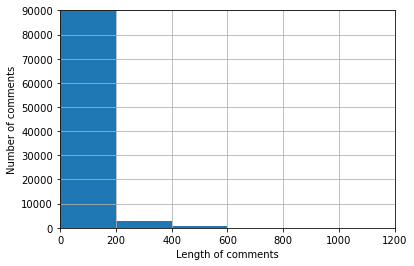

In [96]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

### Comments classified as toxic,severe_toxic,obscene,threat,insult,identity_hate depending on their lengths

In [109]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())
label = label.to_numpy()

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


 ### Frequency of occurence of multilabelled data

In [110]:
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(ct1)
print(ct2)

16225
9865


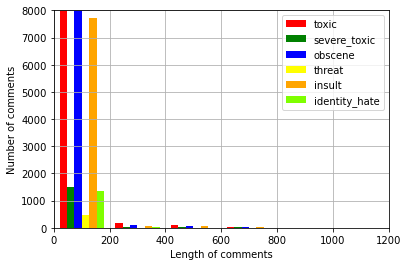

In [111]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','green','blue','yellow','orange','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

# Implementation

## Defining the evaluation metrics

In [100]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

### 1. Binary Relevance (BR) Method with MultinomialNB classifiers

In [101]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
# clf will be the list of the classifiers for all the 6 labels
# each classifier is fit with the training data and corresponding classifier
clf = []
for i in range(6):
    clf.append(MultinomialNB())
    clf[i].fit(list(comment),label[:,i])

C:\Users\Sanskrita\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: Expected 2D array, got 1D array instead:
array=[list(['explanation', 'edits', 'made', 'username', 'hardcore', 'metallica', 'fan', 'reverted', 'werent', 'vandalism', 'closure', 'gas', 'voted', 'new', 'york', 'doll', 'fac', 'please', 'dont', 'remove', 'template', 'talk', 'page', 'since', 'im', 'retired', 'now892053827'])
 list(['daww', 'match', 'background', 'colour', 'im', 'seemingly', 'stuck', 'thanks', 'talk', '2151', 'january', '11', '2016', 'utc'])
 list(['hey', 'man', 'im', 'really', 'trying', 'edit', 'war', 'guy', 'constantly', 'removing', 'relevant', 'information', 'talking', 'edits', 'instead', 'talk', 'page', 'seems', 'care', 'formatting', 'actual', 'info'])
 ...
 list(['spitzer', 'umm', 'actual', 'article', 'prostitution', 'ring', 'crunch', 'captain'])
 list(['look', 'like', 'wa', 'actually', 'put', 'speedy', 'first', 'version', 'deleted', 'look'])
 list(['', 'really', 'dont', 'think', 'understand', 'came', 'idea', 'wa', 'bad', 'right', 'away', 'kind', 'community', 'go', 'bad', 'idea', 'go', 'away', 'instead', 'helping', 'rewrite', ''])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [118]:
list(comment)[1:-1]

[['daww',
  'match',
  'background',
  'colour',
  'im',
  'seemingly',
  'stuck',
  'thanks',
  'talk',
  '2151',
  'january',
  '11',
  '2016',
  'utc'],
 ['hey',
  'man',
  'im',
  'really',
  'trying',
  'edit',
  'war',
  'guy',
  'constantly',
  'removing',
  'relevant',
  'information',
  'talking',
  'edits',
  'instead',
  'talk',
  'page',
  'seems',
  'care',
  'formatting',
  'actual',
  'info'],
 ['',
  'cant',
  'make',
  'real',
  'suggestion',
  'improvement',
  'wondered',
  'section',
  'statistic',
  'later',
  'subsection',
  'type',
  'accident',
  'think',
  'reference',
  'may',
  'need',
  'tidying',
  'exact',
  'format',
  'ie',
  'date',
  'format',
  'etc',
  'later',
  'noone',
  'else',
  'doe',
  'first',
  'preference',
  'formatting',
  'style',
  'reference',
  'want',
  'please',
  'let',
  'know',
  'appears',
  'backlog',
  'article',
  'review',
  'guess',
  'may',
  'delay',
  'reviewer',
  'turn',
  'listed',
  'relevant',
  'form',
  'eg',
  'wi

In [106]:
label

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)